``## Ensemble
1  Bagging -Random Forest-Multiple Decision Trees are created and majority voting is taken

Random Forest

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
import pandas as pd


In [5]:
df=pd.read_csv("train_loan.csv")

In [6]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [7]:
Y=df["loan_status"]

In [8]:
X=df.drop(columns=["id","loan_status"])

In [9]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


Step 2-Data Quality

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [11]:
m=df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
Y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

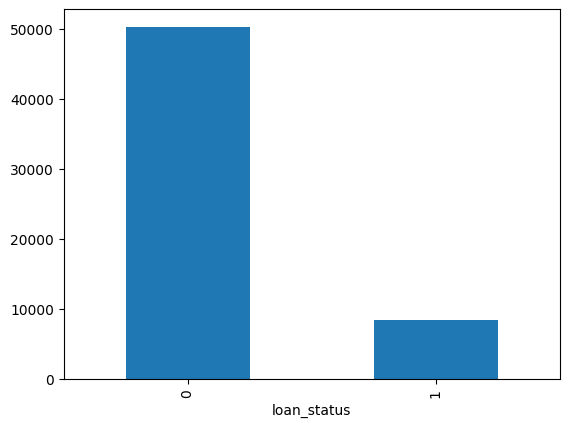

In [14]:
Y.value_counts().plot(kind="bar")

Apply Preprcoessing

In [15]:
cat=list(X.columns[X.dtypes=="object"])
con=list(X.columns[X.dtypes!="object"])

In [16]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [17]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
numpipe=make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())

In [20]:
catpipe=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore",sparse_output=False))

In [21]:
pre=ColumnTransformer(
    [
    ("num",numpipe,con),
    ("cat",catpipe,cat)
    ]
).set_output(transform="pandas")

In [22]:
X_pre=pre.fit_transform(X)

In [23]:
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [25]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
ytrain.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [27]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

STEP 5 - Model Building

In [29]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=1,max_depth=1,min_samples_split=5,min_samples_leaf=5,criterion="gini")

In [30]:
model1.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [31]:
model1.score(xtrain,ytrain)

0.8570210589138034

In [32]:
model1.score(xtest,ytest)

0.8600051155256203

### Hyper Parameter Tuning``

In [33]:
params={"n_estimators":[50,100,150,200,300],
        "max_depth":[2,3,4],
       "min_samples_split":[5,6,7,8]
         }

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
base_rf=RandomForestClassifier()
rscv=RandomizedSearchCV(estimator=base_rf,param_distributions=params,scoring="f1_macro",cv=5,n_jobs=-1)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]},
                   scoring='f1_macro')

In [36]:
rscv.best_params_

{'n_estimators': 200, 'min_samples_split': 7, 'max_depth': 4}

In [37]:
rscv.best_score_

np.float64(0.8444471519926451)

In [38]:
best_rf=rscv.best_estimator_

In [39]:
best_rf

RandomForestClassifier(max_depth=4, min_samples_split=7, n_estimators=200)

#### Model Evaluation

In [40]:
best_rf.score(xtrain,ytrain)

0.9353951743541649

In [41]:
best_rf.score(xtest,ytest)

0.9351180833830676

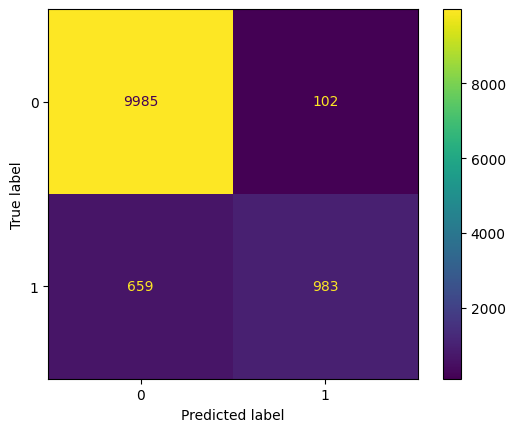

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf,xtest,ytest)


In [43]:
ypred_test=best_rf.predict(xtest)
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [44]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10087
           1       0.91      0.60      0.72      1642

    accuracy                           0.94     11729
   macro avg       0.92      0.79      0.84     11729
weighted avg       0.93      0.94      0.93     11729



### Boosting-Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
model2=GradientBoostingClassifier(
    n_estimators=1,
    min_samples_leaf=5,min_samples_split=5,max_depth=1,learning_rate=0.2
)

In [49]:
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [50]:
model2.score(xtrain,ytrain)

0.8570210589138034

In [51]:
model2.score(xtest,ytest)

0.8600051155256203

### Hyper Parameter``

In [52]:
params2={"n_estimators":[50,100],
         "max_depth":[2,3,4],
         "learning_rate":[0.1,0.2]}

In [53]:
base_gb=GradientBoostingClassifier()
rscv_gb=RandomizedSearchCV(estimator=base_gb,cv=5,param_distributions=params2,scoring="f1_macro",n_jobs=-1)
rscv_gb.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [50, 100]},
                   scoring='f1_macro')

In [54]:
rscv_gb.best_params_

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2}

In [55]:
rscv_gb.best_score_

np.float64(0.8909685697727652)

In [56]:
best_gb=rscv_gb.best_estimator_

In [57]:
best_gb

GradientBoostingClassifier(learning_rate=0.2, max_depth=4)

## Model Evaluation

In [58]:
best_gb.score(xtrain,ytrain)

0.9572214170005968

In [59]:
best_gb.score(xtest,ytest)

0.951828800409242

In [60]:
ypred_test2=best_gb.predict(xtest)

In [61]:
ypred_test2[0:5]

array([0, 0, 0, 0, 0])

In [63]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

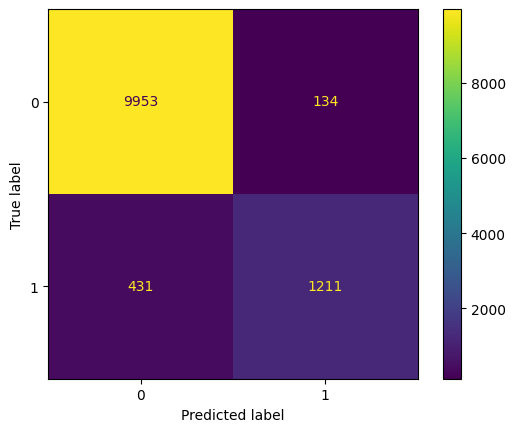

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_gb,xtest,ytest)

In [66]:
print(classification_report(ytest,ypred_test2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.90      0.74      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### USing gradient for out of sample

In [67]:
imp=best_gb.feature_importances_

In [70]:
imp=pd.Series(best_gb.feature_importances_,index=xtrain.columns)

In [71]:
imp

num__person_age                        0.007212
num__person_income                     0.075838
num__person_emp_length                 0.035711
num__loan_amnt                         0.005946
num__loan_int_rate                     0.162298
num__loan_percent_income               0.326320
num__cb_person_cred_hist_length        0.001960
cat__person_home_ownership_MORTGAGE    0.001636
cat__person_home_ownership_OTHER       0.000823
cat__person_home_ownership_OWN         0.010793
cat__person_home_ownership_RENT        0.158552
cat__loan_intent_DEBTCONSOLIDATION     0.030165
cat__loan_intent_EDUCATION             0.000398
cat__loan_intent_HOMEIMPROVEMENT       0.016431
cat__loan_intent_MEDICAL               0.029966
cat__loan_intent_PERSONAL              0.000748
cat__loan_intent_VENTURE               0.002315
cat__loan_grade_A                      0.000000
cat__loan_grade_B                      0.000749
cat__loan_grade_C                      0.016912
cat__loan_grade_D                      0

<Axes: >

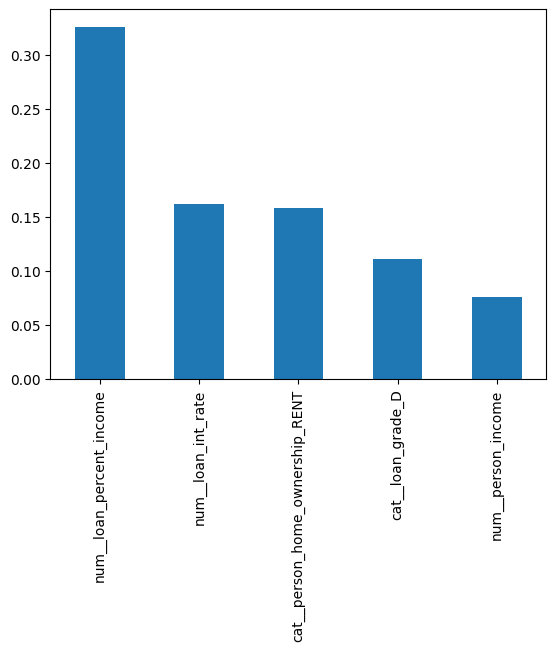

In [74]:
imp.sort_values(ascending=False)[0:5].plot(kind="bar")

### Out of sample Prediction

In [75]:
xnew=pd.read_csv("test_loan.csv")

In [76]:
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [77]:
xnew_pre=pre.transform(xnew)

In [78]:
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [79]:
preds=best_gb.predict(xnew_pre)
preds[0:5]

array([1, 0, 1, 0, 0])

In [81]:
probs=best_gb.predict_proba(xnew_pre)[:,1]
probs

array([0.9960344 , 0.02223164, 0.74626501, ..., 0.01216567, 0.20735201,
       0.95160198])

# SAve the results

In [93]:
result=xnew[["id"]]

In [94]:
result["loan_status_pred"]=preds

In [95]:
result["probability"]=probs

In [97]:
result=result.round(4)

In [99]:
result.to_csv("results.csv",index=False)

In [100]:
import joblib

In [101]:
joblib.dump(best_gb,"gb.joblib")
joblib.dump(pre,"pre.joblib")

['pre.joblib']

In [102]:
joblib.load("gb.joblib")

GradientBoostingClassifier(learning_rate=0.2, max_depth=4)

In [103]:
joblib.load("pre.joblib")

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])